In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\crkpn\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\crkpn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\crkpn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [11]:
df = pd.read_csv("./titanic_train.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df1=df.drop(['PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)

In [17]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [18]:
df1["Age"].fillna(df1["Age"].mean(), inplace=True)

In [19]:
df1["Age"] = df1["Age"].astype(int)


In [20]:
(df1==0).sum()

Survived    549
Pclass        0
Sex           0
Age           7
SibSp       608
Parch       678
Fare         15
dtype: int64

In [21]:
fare_mean = df1['Fare'].mean()
df1['Fare'] = df1['Fare'].replace([0],fare_mean)

In [22]:
(df1==0).sum()

Survived    549
Pclass        0
Sex           0
Age           7
SibSp       608
Parch       678
Fare          0
dtype: int64

In [23]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [24]:
df1 = pd.get_dummies(df1, columns=["Sex"], drop_first=True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22,1,0,7.2500,1
1,1,1,38,1,0,71.2833,0
2,1,3,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,0,3,35,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1
887,1,1,19,0,0,30.0000,0
888,0,3,29,1,2,23.4500,0
889,1,1,26,0,0,30.0000,1


In [25]:
df1.rename(columns={"Sex_male": "Sex"}, inplace=True)

In [26]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22,1,0,7.2500,1
1,1,1,38,1,0,71.2833,0
2,1,3,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,0,3,35,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1
887,1,1,19,0,0,30.0000,0
888,0,3,29,1,2,23.4500,0
889,1,1,26,0,0,30.0000,1


In [40]:
import pandas as pd

def cap_outliers(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    # Cap the outliers
    series[series < lower_bound] = lower_bound
    series[series > upper_bound] = upper_bound

# Iterate over columns and apply capping
for column in df1.columns:
    cap_outliers(df1[column])

# Display the DataFrame with capped outliers
df1.head()


C:\Windows\Temp\ipykernel_22004\1095289674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
C:\Windows\Temp\ipykernel_22004\1095289674.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
C:\Windows\Temp\ipykernel_22004\1095289674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
C:\Windows\Temp\ipyker

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1.0,0,7.25000,1
1,1,1,38.0,1.0,0,68.62302,0
2,1,3,26.0,0.0,0,7.92500,0
3,1,1,35.0,1.0,0,53.10000,0
4,0,3,35.0,0.0,0,8.05000,1


In [42]:
X = df1.drop('Survived',axis=1)
Y = df1['Survived']

<Axes: xlabel='Fare'>

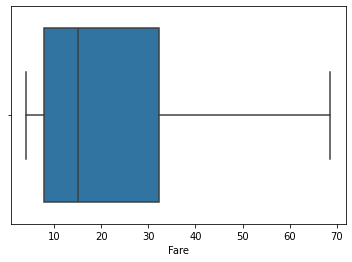

In [41]:
sns.boxplot(x=df1['Fare'])

In [28]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [44]:
list(X_train.columns)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

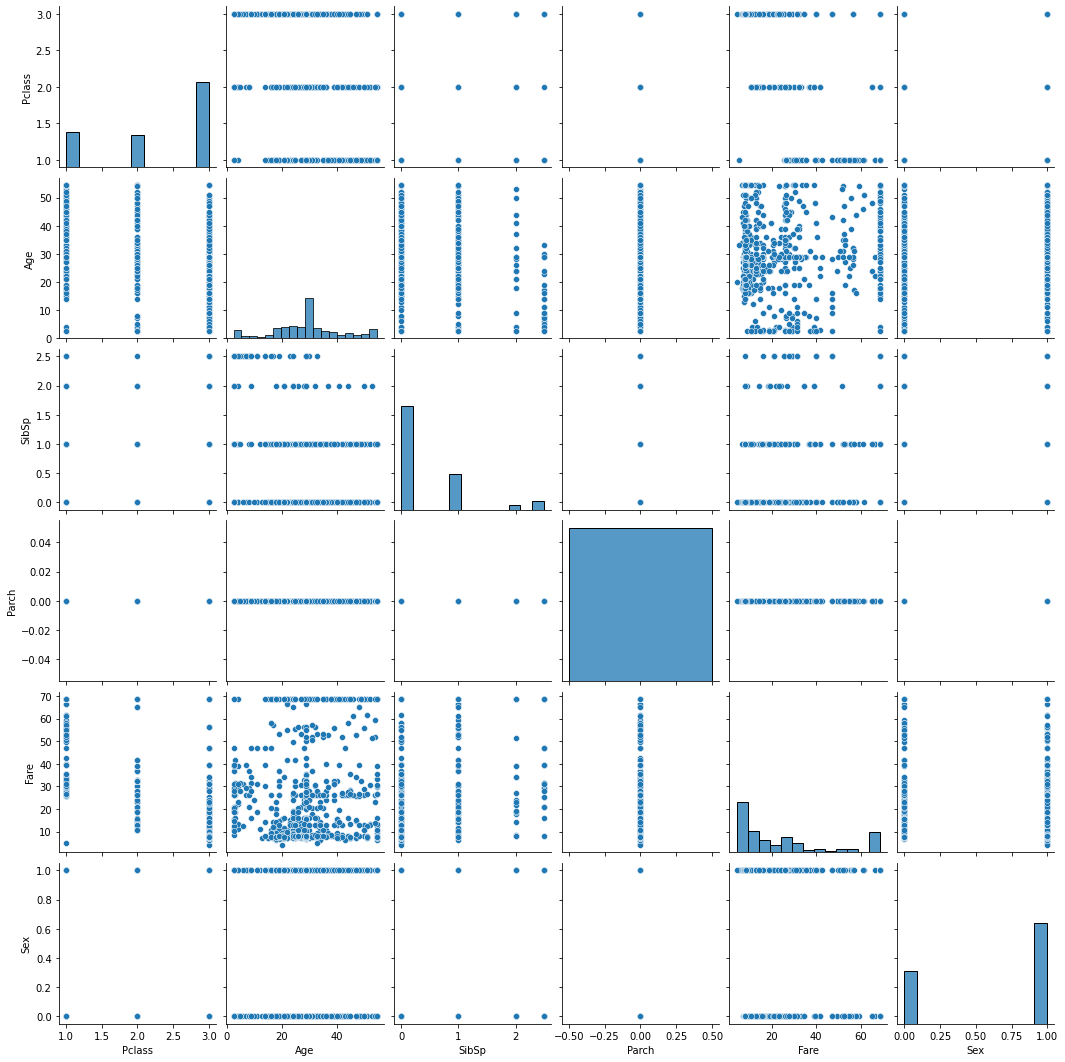

In [45]:
sns.pairplot(X_train, vars=list(X_train.columns))

In [32]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [46]:
X_train1 = pd.DataFrame(st.fit_transform(X_train))
X_test1 = pd.DataFrame(st.fit_transform(X_test))

In [47]:
X_train1


,0,1,2,3,4,5
0,-1.614136,1.307108,-0.604701,0.0,0.172095,0.724310
1,-0.400551,-0.504157,-0.604701,0.0,-0.563797,0.724310
2,0.813034,0.236815,-0.604701,0.0,-0.804742,0.724310
3,0.813034,-0.257166,0.773050,0.0,-0.808104,0.724310
4,0.813034,-1.903771,2.839677,0.0,0.303844,-1.380624
...,...,...,...,...,...,...
707,0.813034,-0.668817,-0.604701,0.0,-0.817798,-1.380624
708,-1.614136,-0.010176,-0.604701,0.0,0.290787,0.724310
709,0.813034,0.977787,2.150802,0.0,-0.511178,0.724310
710,-1.614136,-1.245129,0.773050,0.0,2.077012,-1.380624


In [67]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex
count,712.000000,712.000000,712.000000,712.0,712.000000,712.000000
mean,2.330056,29.123596,0.438904,0.0,24.875183,0.655899
std,0.824584,12.154747,0.726331,0.0,21.077677,0.475408
min,1.000000,2.500000,0.000000,0.0,4.012500,0.000000
25%,2.000000,22.000000,0.000000,0.0,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.0,15.047900,1.000000
75%,3.000000,35.000000,1.000000,0.0,31.591677,1.000000
max,3.000000,54.500000,2.500000,0.0,68.623020,1.000000


c:\Users\crkpn\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


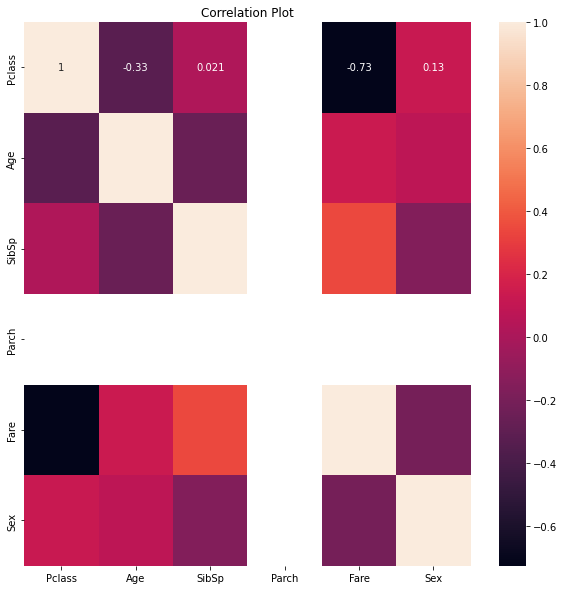

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Plot")
plt.show()
